In [1]:
import pandas as pd
import numpy as np
from numpy import nan, NaN,NAN
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
aerofit=pd.read_csv("aerofit_treadmill.txt")

In [3]:
df=aerofit.copy()
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [4]:
df.shape

(180, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## **Observation-No missing values present .** 

# **To Identify Unique Values in the data** #

In [7]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [8]:
df["Education"].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [9]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [10]:
df["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

# **Outlier Detection**

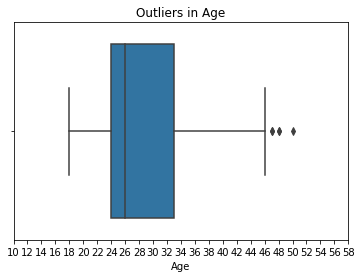

In [11]:
sns.boxplot(df["Age"])
plt.xticks(np.arange(10,60,2))
plt.title("Outliers in Age")
#plt.grid()
plt.show()

## **Observation-Age above 46 years are outliers**

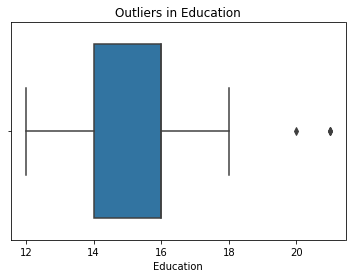

In [12]:
sns.boxplot(df["Education"])
plt.title("Outliers in Education")
#plt.grid()
plt.show()

## **Observation-Education above 18 years are outliers**

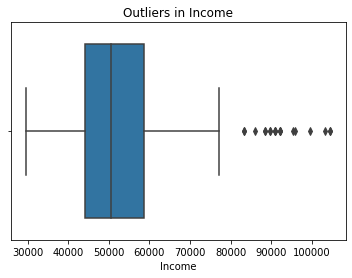

In [13]:
sns.boxplot(df["Income"])
plt.title("Outliers in Income")
#plt.grid()
plt.show()

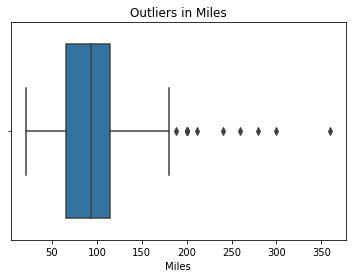

In [14]:
sns.boxplot(df["Miles"])
plt.title("Outliers in Miles")
#plt.grid()
plt.show()

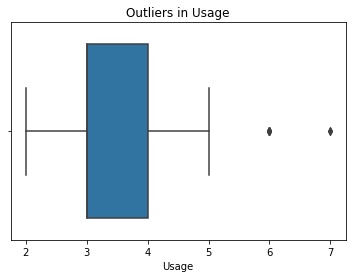

In [15]:
sns.boxplot(df["Usage"])
plt.title("Outliers in Usage")
#plt.grid()
plt.show()

## **Observation-There are more outliers in Income and Miles as compared to other data variables**

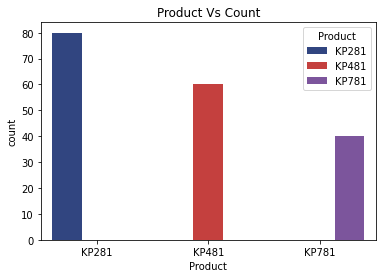

In [16]:
colors = ["#243E8D", "#DB2A27","#7D49A8"]
sns.set_palette(sns.color_palette(colors))
sns.countplot(x="Product",data=df,hue="Product")
plt.title("Product Vs Count")
plt.show()

## **Observation -The most selled is the base model ie,KP281 and the least selled is the high end model ie,KP781**

In [17]:
pr_gen=df.groupby(["Product","Gender"])["Product"].count().to_frame()
pr_gen.rename(columns={"Product":"count"},inplace=True)
pr_gen.reset_index(inplace=True)
pr_gen

,Product,Gender,count
0,KP281,Female,40
1,KP281,Male,40
2,KP481,Female,29
3,KP481,Male,31
4,KP781,Female,7
5,KP781,Male,33


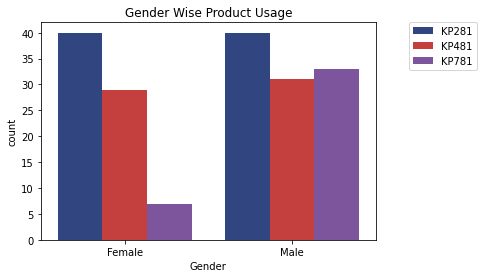

In [18]:
colors = ["#243E8D", "#DB2A27","#7D49A8"]
sns.set_palette(sns.color_palette(colors))
sns.barplot(x="Gender",y="count",data=pr_gen,hue="Product")
plt.title("Gender Wise Product Usage")
plt.legend(bbox_to_anchor=(1.1 ,1), loc='upper left', borderaxespad=0)
plt.show()

## **Observation-Males preffered the high end model KP781 more.The other two models seems to be equily liked by both the genders,but this can be better decided by the probabilty plots done under the head Customer Profiling.**

In [19]:
pr_gen_age=df.groupby(["Product","Gender","Age"])["Product"].count().to_frame()
pr_gen_age.rename(columns={"Product":"count"},inplace=True)
pr_gen_age.reset_index(inplace=True)
pr_gen_age

,Product,Gender,Age,count
0,KP281,Female,19,1
1,KP281,Female,20,1
2,KP281,Female,21,2
3,KP281,Female,22,3
4,KP281,Female,23,3
...,...,...,...,...
97,KP781,Male,40,1
98,KP781,Male,42,1
99,KP781,Male,45,1
100,KP781,Male,47,1


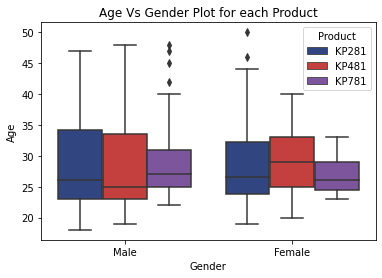

In [20]:
colors = ["#243E8D", "#DB2A27","#7D49A8"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(x="Gender",y="Age",data=df,hue="Product")
plt.title("Age Vs Gender Plot for each Product")
#plt.yticks(np.arange(16,60,2))
plt.show()

## **Observation-The median ages of females using KP481 is higher than males whereas for the other two models the median age of males are higher .Outliers are observed in the plot for the combination of Male-KP781 and Female-KP281.**

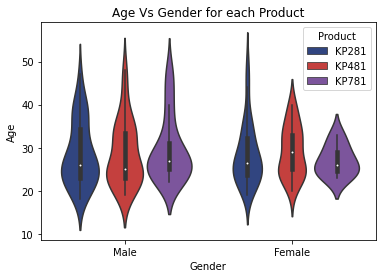

In [21]:
colors = ["#243E8D", "#DB2A27","#7D49A8"]
sns.set_palette(sns.color_palette(colors))
sns.violinplot(x="Gender",y="Age",data=df,hue="Product")
plt.title("Age Vs Gender for each Product")

plt.show()

## **Observation-For KP281and KP481 there are more male users in the age group 20-30 than female users.Whereas for KP781 there are no female users beyond age 35**

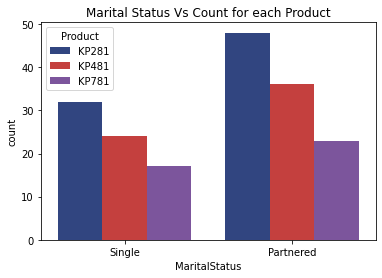

In [22]:
sns.countplot(x="MaritalStatus",data=df,hue="Product")
plt.title("Marital Status Vs Count for each Product")
plt.show()

## **Observation-Across all models,people with marital status as Partnered are using the fitness equipments more**

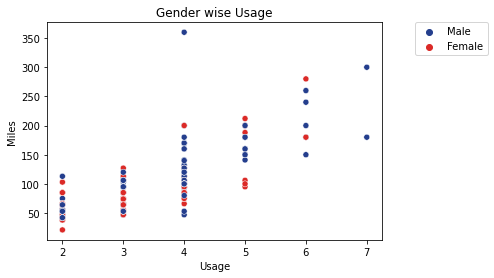

In [23]:
sns.scatterplot(x="Usage",y="Miles",data=df,hue="Gender")
plt.title("Gender wise Usage")
plt.legend(bbox_to_anchor=(1.1 ,1), loc='upper left', borderaxespad=0)
#plt.yticks(np.arange(16,60,2))
plt.show()

## **Observation-The miles covered and the usage of the product is higher in males as compared to females**

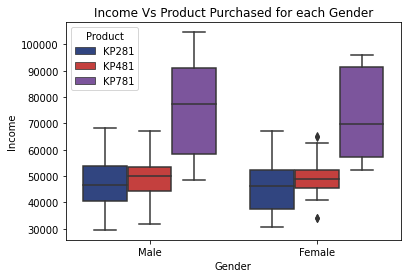

In [24]:
sns.boxplot(x="Gender",y="Income",data=df,hue="Product")
plt.title("Income Vs Product Purchased for each Gender")
plt.show()

## **Observation-The people who purchased the high end model KP781 are having higher income compared to the lower variants.Their median income is close to 8000 and 7000 dollars for male and female repectively**

# **Customer Profiling**

In [25]:
pd.crosstab(index=df["Product"],columns=df["Gender"],margins=True,margins_name="Total")

Gender,Female,Male,Total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
Total,76,104,180


In [26]:
pd.crosstab(index=df["Product"],columns=df["Gender"],normalize="columns",margins=True,margins_name="Marginal Probability")

Gender,Female,Male,Marginal Probability
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


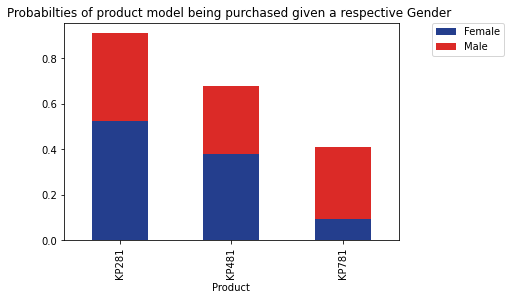

In [27]:
pd.crosstab(index=df["Product"],columns=df["Gender"],normalize="columns").plot.bar(stacked=True)
plt.title("Probabilties of product model being purchased given a respective Gender ")
plt.legend(bbox_to_anchor=(1.1 ,1), loc='upper left', borderaxespad=0)
plt.show()

## **Observation-Females prefered the base and the intermediate models more than Males.Whereas the advanced model is prefered more by males.**

In [28]:
pd.crosstab(index=df["Product"],columns=df["Fitness"],margins=True,margins_name="Total")

Fitness,1,2,3,4,5,Total
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
Total,2,26,97,24,31,180


## **Observation-53% of the sample belonged to Fitness level 3 .17.2% in fitness level 5 and 14% in fitness level 2**

In [29]:
d=pd.crosstab(index=df["Product"],columns=df["Fitness"],normalize="columns")
d

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.5,0.538462,0.556701,0.375000,0.064516
KP481,0.5,0.461538,0.402062,0.333333,0.000000
KP781,0.0,0.000000,0.041237,0.291667,0.935484


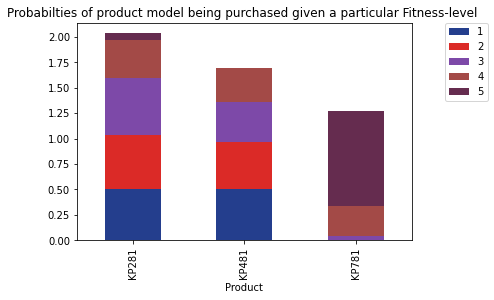

In [30]:
colors = ["#243E8D", "#DB2A27","#7D49A8","#A34A47","#652C4F"]
sns.set_palette(sns.color_palette(colors))
pd.crosstab(index=df["Product"],columns=df["Fitness"],normalize="columns").plot.bar(stacked=True)
plt.title("Probabilties of product model being purchased given a particular Fitness-level ")
plt.legend(bbox_to_anchor=(1.1 ,1), loc='upper left', borderaxespad=0)
plt.show()

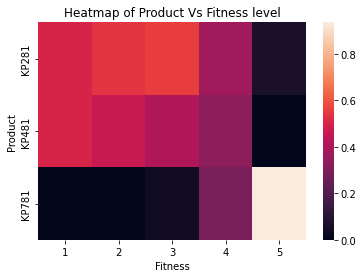

In [31]:
sns.heatmap(d)
plt.title("Heatmap of Product Vs Fitness level")
plt.show()

## **Observation-Given fitness level is 5,the probability that advanced model is purchased is 0.93.Given fitness level 4,3 and 2 the popular model is the base model(KP281)**

In [32]:
df.insert(9,"AgeGroup","")

In [33]:
idx=df.loc[(df["Age"]>=18)&(df["Age"]<=24)].index
idx

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
             26,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96, 140, 141, 142, 143, 144, 145, 146, 147,
            148, 149],
           dtype='int64')

In [34]:
df.loc[idx,["AgeGroup"]]='18-24'

In [35]:
idx=df.loc[(df["Age"]>=25)&(df["Age"]<=34)].index
idx

Int64Index([ 27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  97,  98,  99,
            100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
            113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
            126, 127, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
            161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172],
           dtype='int64')

In [36]:
df.loc[idx,["AgeGroup"]]='25-34'

In [37]:
idx=df.loc[(df["Age"]>=35)&(df["Age"]<=44)].index
idx

Int64Index([ 63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
             76, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 173, 174,
            175, 176],
           dtype='int64')

In [38]:
df.loc[idx,["AgeGroup"]]='35-44'

In [39]:
idx=df.loc[(df["Age"]>=45)].index
idx

Int64Index([77, 78, 79, 138, 139, 177, 178, 179], dtype='int64')

In [40]:
df.loc[idx,["AgeGroup"]]='45&above'

In [41]:
pd.crosstab(index=df["Product"],columns=df["AgeGroup"],margins=True,margins_name="Total")

AgeGroup,18-24,25-34,35-44,45&above,Total
Product,,,,,
KP281,27,36,14,3,80
KP481,17,31,10,2,60
KP781,10,23,4,3,40
Total,54,90,28,8,180


In [42]:
pd.crosstab(index=df["Product"],columns=df["AgeGroup"],normalize="all",margins=True,margins_name="Total")

AgeGroup,18-24,25-34,35-44,45&above,Total
Product,,,,,
KP281,0.150000,0.200000,0.077778,0.016667,0.444444
KP481,0.094444,0.172222,0.055556,0.011111,0.333333
KP781,0.055556,0.127778,0.022222,0.016667,0.222222
Total,0.300000,0.500000,0.155556,0.044444,1.000000


## **Observation-Young Adults in the age group of 18-24 years(30%) and 25-34 years(50%) are mostly the users of the product.**

In [43]:
s=pd.crosstab(index=df["Product"],columns=df["AgeGroup"],normalize="columns")
s

AgeGroup,18-24,25-34,35-44,45&above
Product,,,,
KP281,0.500000,0.400000,0.500000,0.375
KP481,0.314815,0.344444,0.357143,0.250
KP781,0.185185,0.255556,0.142857,0.375


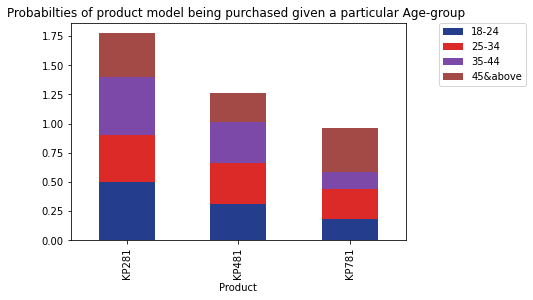

In [44]:
pd.crosstab(index=df["Product"],columns=df["AgeGroup"],normalize="columns").plot.bar(stacked=True)
plt.title("Probabilties of product model being purchased given a particular Age-group ")
plt.legend(bbox_to_anchor=(1.1 ,1), loc='upper left', borderaxespad=0)
plt.show()

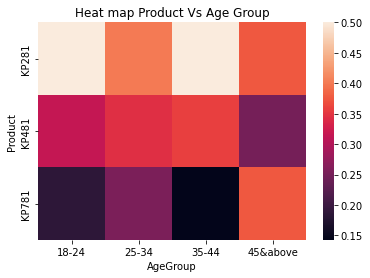

In [45]:
sns.heatmap(s)
plt.title("Heat map Product Vs Age Group")
plt.show()

## **Observation-The base model are popular within the age groups from 18-24 and 35- 44 years.The Intermediate within age groups between 18 to 44 years with slight variations in their conditional probabilities. The advanced model is popular mostly for age group 25-34 years and 45&above years**

In [46]:
pd.crosstab(index=df["Product"],columns=[df.AgeGroup,df.MaritalStatus],margins=True)

AgeGroup          18-24            25-34            35-44         45&above  \
MaritalStatus Partnered Single Partnered Single Partnered Single Partnered   
Product                                                                      
KP281                12     15        23     13        10      4         3   
KP481                 9      8        17     14         8      2         2   
KP781                 1      9        18      5         2      2         2   
All                  22     32        58     32        20      8         7   

AgeGroup              All  
MaritalStatus Single       
Product                    
KP281              0   80  
KP481              0   60  
KP781              1   40  
All                1  180

In [47]:
k=pd.crosstab(index=df["Product"],columns=[df.AgeGroup,df.MaritalStatus],normalize="columns")
k

AgeGroup          18-24              25-34              35-44         \
MaritalStatus Partnered   Single Partnered   Single Partnered Single   
Product                                                                
KP281          0.545455  0.46875  0.396552  0.40625       0.5   0.50   
KP481          0.409091  0.25000  0.293103  0.43750       0.4   0.25   
KP781          0.045455  0.28125  0.310345  0.15625       0.1   0.25   

AgeGroup       45&above         
MaritalStatus Partnered Single  
Product                         
KP281          0.428571    0.0  
KP481          0.285714    0.0  
KP781          0.285714    1.0

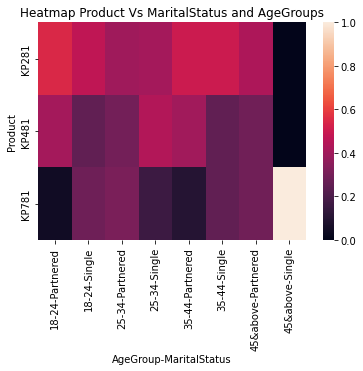

In [75]:
sns.heatmap(k)
plt.title("Heatmap Product Vs MaritalStatus and AgeGroups")
plt.show()


## **Observation-For Partnered age groups base model is prefered more.Whereas for single the preference also depends on the age group they belong to.For instance the people with Marital status as single in the age group  of 18-24 years  and 35-44 years prefered the base model more while25-34 years prefered the Intermediate model.For 45&above strong conclusions cannot be drawn since only 4% of the total sample is from this age group.**

In [52]:
df.insert(10,"IncomeGroup","")


In [56]:
idx=df.loc[(df["Income"]>25000)&(df["Age"]<=45000)].index
df.loc[idx,["IncomeGroup"]]='25001-45000'

In [57]:
idx=df.loc[(df["Income"]>45000)&(df["Age"]<=65000)].index
df.loc[idx,["IncomeGroup"]]='45001-65000'

In [58]:
idx=df.loc[(df["Income"]>65000)&(df["Age"]<=85000)].index
df.loc[idx,["IncomeGroup"]]='65001-85000'

In [60]:
idx=df.loc[(df["Income"]>85000)].index
df.loc[idx,["IncomeGroup"]]='85001&above'

In [61]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,IncomeGroup
0,KP281,18,Male,14,Single,3,4,29562,112,18-24,25001-45000
1,KP281,19,Male,15,Single,2,3,31836,75,18-24,25001-45000
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-24,25001-45000
3,KP281,19,Male,12,Single,3,3,32973,85,18-24,25001-45000
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-24,25001-45000
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,35-44,65001-85000
176,KP781,42,Male,18,Single,5,4,89641,200,35-44,85001&above
177,KP781,45,Male,16,Single,5,5,90886,160,45&above,85001&above
178,KP781,47,Male,18,Partnered,4,5,104581,120,45&above,85001&above


In [63]:
pd.crosstab(index=df["Product"],columns=df["IncomeGroup"],margins=True)

IncomeGroup,25001-45000,45001-65000,65001-85000,85001&above,All
Product,,,,,
KP281,34,44,2,0,80
KP481,15,43,2,0,60
KP781,0,16,7,17,40
All,49,103,11,17,180


## **Observation-People with income less than 65000 dollars preffered the base in intermediate models more.Whereas people with income higher that than this prefered the Advance model .**

In [64]:
pd.crosstab(index=df["Product"],columns=df["Education"],margins=True)

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,2,3,30,4,39,2,0,0,80
KP481,1,2,23,1,31,2,0,0,60
KP781,0,0,2,0,15,19,1,3,40
All,3,5,55,5,85,23,1,3,180


In [67]:
s=pd.crosstab(index=df["Product"],columns=df["Education"],normalize='columns')
s

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,0.666667,0.6,0.545455,0.8,0.458824,0.086957,0.0,0.0
KP481,0.333333,0.4,0.418182,0.2,0.364706,0.086957,0.0,0.0
KP781,0.000000,0.0,0.036364,0.0,0.176471,0.826087,1.0,1.0


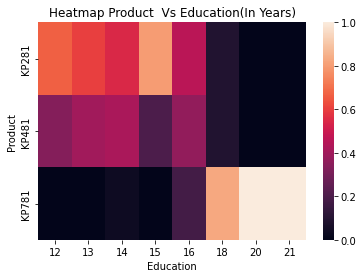

In [70]:
sns.heatmap(s)
plt.title("Heatmap Product  Vs Education(In Years)")
plt.show()

## **Observation-There is a clear distinction in the preference of model ie,People with upto 15years of education prefer Base model more over the other models.A person with higher years of education say (18 years)prefers the advance model more.Since education above 18years are outliers in the sample strong conclusions cannot be made for them .**

# **Recommendation**

## **44% of the sample prefered the entry level treadmill KP281,followed by the mid-level .The advanced model is having least preference(22%).So its likely to have more KP281 models which could sell more than the other models** 

## **53% of the sample belonged to Fitness level 3 followed by Fitness level 5 and 2 .Hence more emphasis must be given to their preferences.The Probability plots reveal that probability of choosing the basemodel given that the person is in Fitness level 3 is 0.556 and that he/she choose the intermediate model is 0.4.Thus once again the base model is prefered more.**

## **The probability plots also shows that people with fitness level 5,uses the advanced model ie,KP781.Its probability is 0.93.Hence the sales of this model can be increased among people who are very fit**.

## **People with Higher income (>65000 dollars)prefered the Advanced model more whereas people with lower income prefered the base and intermediate models.Hence sales of the repective models can be increased based on customer Income**

## **The people with Marital status as single in the age group  of 18-24 years  and 35-44 years prefered the base model more while25-34 years prefered the Intermediate model.For 45&above strong conclusions cannot be drawn since only 4% of the total sample is from this age group and they are also outliers**

## **People with Marital status as Partnered prefered the Base model hence the sales of KP281 can be increased in the partnered age groups**